In [482]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import floor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import pandas as pd
from random import sample


#dt regress

In [483]:
dates_all = [
    ['3_11', '2020-03-11'],
    ['3_10', '2020-03-10'],
    ['3_9', '2020-03-09'],
    ['3_8', '2020-03-08'],
    ['3_7', '2020-03-07'],
    ['3_6', '2020-03-06'],
    ['3_5', '2020-03-05'],
    ['3_4', '2020-03-04'],
    ['3_3', '2020-03-03'],
    ['3_2', '2020-03-02'],
    ['3_1', '2020-03-01'],
    ['2_29', '2020-02-29'],
    ['2_28', '2020-02-28'],
    ['2_27', '2020-02-27'],
    ['2_26', '2020-02-26'],
    ['2_25', '2020-02-25'],
    ['2_24', '2020-02-24'],
    ['2_23', '2020-02-23'],
    ['2_22', '2020-02-22'],
    ['2_21', '2020-02-21'],
    ['2_20', '2020-02-20'],
    ['2_13', '2020-02-13'],
    ['2_12', '2020-02-12'],
    ['2_11', '2020-02-11'],
    ['2_10', '2020-02-10'],
    ['2_9', '2020-02-09'],
    ['2_8', '2020-02-08'],
    ['2_7', '2020-02-07'],
    ['2_6', '2020-02-06'],
    ['2_5', '2020-02-05'],
    ['2_4', '2020-02-04'],
    ['2_3', '2020-02-03'],
    ['2_2', '2020-02-02'],
    ['2_1', '2020-02-01'],
    ['1_31', '2020-01-31'],
    ['1_30', '2020-01-30'],
    ['1_29', '2020-01-29'],
    ['1_28', '2020-01-28'],
    ['1_27', '2020-01-27'],
    ['1_26', '2020-01-26'],
    ['1_25', '2020-01-25'],
    ['1_24', '2020-01-24'],
    ['1_23', '2020-01-23'],
    ['1_22', '2020-01-22'],
    ['1_20', '2020-01-20'],
    ['1_19', '2020-01-19'],
    ['1_18', '2020-01-18'],
    ['1_17', '2020-01-17'],
    ['1_16', '2020-01-16'],
    ['1_15', '2020-01-15'],
    ['1_14', '2020-01-14'],
    ['1_13', '2020-01-13'],
    ['1_12', '2020-01-12'],
    ['1_11', '2020-01-11'],
    ['1_10', '2020-01-10'],
    ['1_9', '2020-01-09'],
    ['1_8', '2020-01-08'],
    ['1_7', '2020-01-07'],
    ['1_6', '2020-01-06'],
    ['1_5', '2020-01-05'],
    ['1_4', '2020-01-04'],
    ['1_3', '2020-01-03'],
    ['1_2', '2020-01-02'],
    ['1_1', '2020-01-01'],
    ['12_31', '2019-12-31'],
    ['12_30', '2019-12-30'],
    ['12_29', '2019-12-29'],
    ['12_28', '2019-12-28'],
    ['12_27', '2019-12-27'],
    ['12_26', '2019-12-26'],
    ['12_25', '2019-12-25'],
    ['12_23', '2019-12-23'],
    ['12_22', '2019-12-22'],
    ['12_21', '2019-12-21'],
    ['12_20', '2019-12-20'],
    ['12_19', '2019-12-19'],
    ['12_18', '2019-12-18'],
    ['12_17', '2019-12-17'],
    ['12_16', '2019-12-16'],
    ['12_15', '2019-12-15'],
    ['12_14', '2019-12-14'],
    ['12_13', '2019-12-13'],
    ['12_12', '2019-12-12'],
    ['12_11', '2019-12-11'],
    ['12_10', '2019-12-10'],
    ['12_9', '2019-12-09'],
    ['12_8', '2019-12-08'],
    ['12_7', '2019-12-07'],
    ['12_6', '2019-12-06'],
    ['12_5', '2019-12-05'],
    ['12_4', '2019-12-04'],
    ['12_3', '2019-12-03'],
    ['12_2', '2019-12-02'],
    ['12_1', '2019-12-01'],
    ['11_30', '2019-11-30'],
    ['11_29', '2019-11-29'],
    ['11_27', '2019-11-27'],
    ['11_26', '2019-11-26'],
    ['11_25', '2019-11-25'],
    ['11_24', '2019-11-24'],
    ['11_23', '2019-11-23'],
    ['11_22', '2019-11-22'],
    ['11_21', '2019-11-21'],
    ['11_20', '2019-11-20'],
    ['11_19', '2019-11-19'],
    ['11_18', '2019-11-18'],
    ['11_17', '2019-11-17'],
    ['11_16', '2019-11-16'],
    ['11_15', '2019-11-15'],
    ['11_14', '2019-11-14'],
    ['11_13', '2019-11-13'],
    ['11_12', '2019-11-12'],
    ['11_11', '2019-11-11'],
    ['11_10', '2019-11-10'],
    ['11_9', '2019-11-09'],
    ['11_8', '2019-11-08'],
    ['11_7', '2019-11-07'],
    ['11_6', '2019-11-06'],
    ['11_5', '2019-11-05'],
    ['11_4', '2019-11-04'],
    ['11_3', '2019-11-03'],
    ['11_2', '2019-11-02'],
    ['11_1', '2019-11-01'],
    ['10_31', '2019-10-31'],
    ['10_30', '2019-10-30'],
    ['10_29', '2019-10-29'],
    ['10_28', '2019-10-28'],
    ['10_27', '2019-10-27'],
    ['10_26', '2019-10-26'],
    ['10_25', '2019-10-25'],
    ['10_24', '2019-10-24'],
    ['10_23', '2019-10-23'],
    ['10_22', '2019-10-22'],   
]

In [484]:
def reduceForProjectionAnalysis(file):
    file = file[file['injury_status'] != 'O']
    file = file[file['injury_status'] != 'Q']
    file['FantasyFuelPPGProj'] = file['ppg_projection']
    file['FantasyFuelValueProj'] = file['value_projection']
    file['DFN_PPGProj'] = file['Proj FP']
    file['DFN_ValueProj'] = file['Proj Val']
    
    cleaned_file = pd.DataFrame()
    cleaned_file['Player Name'] = file['Player Name']
    cleaned_file['Actual FP'] = file['Actual FP']
    cleaned_file['team'] = file['team']
    cleaned_file['Pos'] = file['Pos']
    cleaned_file['Salary'] = file['Salary']
    cleaned_file['DFN_MinProj'] = file['Proj Min']
    cleaned_file['Avg Proj'] = (file['DFN_PPGProj']+file['FantasyFuelPPGProj'])/2
    cleaned_file['Avg Value Proj'] = ((file['DFN_ValueProj']+file['FantasyFuelValueProj'])/2)
    cleaned_file['Avg Skewed Min'] = ((file['L2 Min']+file['L5 Min']+file['S Min'])/3)
    cleaned_file['Avg Skewed FP'] = ((file['L5 FP']+file['S FP']+file['Ceil FP']+file['Floor FP']+cleaned_file['Avg Proj'])/5)
    cleaned_file['Proj Min Enhanced'] = (cleaned_file['Avg Proj'] / cleaned_file['Avg Skewed Min'] ) * cleaned_file['DFN_MinProj']
    cleaned_file = cleaned_file.replace([np.inf, -np.inf], 0)
    cleaned_file = cleaned_file.fillna(0)
    return cleaned_file

def standardize(df):
    result = df.copy()
    categories = ['Avg Proj', 'DFN_MinProj', 'Proj Min Enhanced', 'Avg Skewed FP', 'Avg Value Proj', 'Actual FP']
    for feature_name in categories:
        mean_value = df[feature_name].mean()
        std_value = df[feature_name].std()
        result[feature_name + ' Stan'] = ((df[feature_name] - mean_value) / (std_value))
    result = result.replace([np.inf, -np.inf], 0)

    result = result.fillna(0)
    return result

def buildRegressionModel(master_training_data, cleaned_file):
    drop_attribs = ['Player Name','team','Pos','Salary', 'Actual FP', 'Actual FP Stan','Avg Proj', 'DFN_MinProj', 'Proj Min Enhanced', 'Avg Skewed FP', 'Avg Skewed Min', 'Avg Value Proj']
    features = master_training_data.drop(drop_attribs, axis=1).copy()
    labels = master_training_data['Actual FP Stan'].copy()
    model = SGDRegressor()
    params = {
        'alpha': [1,.1,.01,.001,.0001],
        'l1_ratio': [.1,.2,.3,.4,.5,.6,.7,.8,.9],
        'max_iter': [10000,100000,1000000],
        'penalty': ('l2', 'l1', 'elasticnet'),
        'early_stopping': [True, False],
    }
    
    reg = GridSearchCV(model, params)
    reg.fit(features, labels)
    print(reg.best_params_)
    scores = cross_val_score( reg.best_estimator_, features, labels, scoring='neg_mean_squared_error', cv=10)
    rmse_scores = np.sqrt(-scores)
    display_scores(rmse_scores, 'Actual FP')
    cleaned_file['predictions'] = reg.best_estimator_.predict(cleaned_file.drop(drop_attribs, axis=1).copy())
    return rmse_scores, cleaned_file

def display_scores(scores, label_type):
    print("*", label_type)
    print('Scores:', scores)
    print('Mean:' ,scores.mean())
    print('Std:', scores.std())  
    

In [487]:
def optimizeRegressionModel():
    build_limit = 0
    master_training_data = pd.DataFrame()
    dates_all.reverse()
    deviations = []
    means = []
    for game_day in dates_all:
        file_name = 'HistoricalData_Merged/{}'.format(game_day[1])
        file = pd.read_csv(file_name)
        cleaned_file = standardize(reduceForProjectionAnalysis(file))
        if(build_limit > 3):
            model_scores, file_with_predictions = buildRegressionModel(master_training_data, cleaned_file)
            print(game_day[1])
            print(build_limit)
            deviations.append(model_scores.std())
            means.append(model_scores.mean())
            master_training_data = master_training_data.append(cleaned_file.drop(['predictions'], axis=1), sort=False)
        else:
            master_training_data = master_training_data.append(cleaned_file, sort=False)
        build_limit = build_limit + 1
    return deviations, means

In [489]:
x,y  = optimizeRegressionModel()

{'alpha': 0.1, 'early_stopping': False, 'l1_ratio': 0.8, 'max_iter': 1000000, 'penalty': 'elasticnet'}
* Actual FP
Scores: [0.81441512 0.77161265 0.60092851 0.56657453 0.56381932 0.67547327
 0.79066151 0.70732438 0.55849839 0.43986477]
Mean: 0.6489172464362936
Std: 0.11612715944513073
2019-10-26
4
{'alpha': 0.001, 'early_stopping': False, 'l1_ratio': 0.7, 'max_iter': 100000, 'penalty': 'l2'}
* Actual FP
Scores: [0.82924521 0.61564446 0.60559246 0.64406245 0.68561364 0.67796422
 0.51473317 0.81616787 0.60158528 0.47771659]
Mean: 0.6468325352803459
Std: 0.10733166815794108
2019-10-27
5
{'alpha': 0.01, 'early_stopping': True, 'l1_ratio': 0.2, 'max_iter': 10000, 'penalty': 'l1'}
* Actual FP
Scores: [0.8155581  0.60941173 0.60209881 0.65110482 0.7565932  0.55218509
 0.73189884 0.65763765 0.49500884 0.56240907]
Mean: 0.6433906139863496
Std: 0.09502939053516249
2019-10-28
6
{'alpha': 0.001, 'early_stopping': True, 'l1_ratio': 0.2, 'max_iter': 10000, 'penalty': 'l2'}
* Actual FP
Scores: [0.778

{'alpha': 0.001, 'early_stopping': True, 'l1_ratio': 0.7, 'max_iter': 1000000, 'penalty': 'l1'}
* Actual FP
Scores: [0.68305821 0.62052518 0.68835139 0.69311965 0.68177568 0.62880192
 0.64477352 0.64084458 0.65694434 0.64736533]
Mean: 0.6585559797123057
Std: 0.02486976269935377
2019-11-23
32
{'alpha': 0.0001, 'early_stopping': True, 'l1_ratio': 0.5, 'max_iter': 10000, 'penalty': 'l2'}
* Actual FP
Scores: [0.68196194 0.63985229 0.69633399 0.66695536 0.68101488 0.63660372
 0.63798382 0.63465837 0.68906901 0.63013567]
Mean: 0.6594569051079346
Std: 0.02471163873862838
2019-11-24
33
{'alpha': 0.001, 'early_stopping': True, 'l1_ratio': 0.3, 'max_iter': 10000, 'penalty': 'l1'}
* Actual FP
Scores: [0.67933997 0.63737617 0.71040573 0.64477652 0.69119931 0.63471904
 0.6326717  0.67003174 0.64578878 0.66048177]
Mean: 0.6606790717796727
Std: 0.025131531528838985
2019-11-25
34
{'alpha': 0.01, 'early_stopping': True, 'l1_ratio': 0.5, 'max_iter': 100000, 'penalty': 'l1'}
* Actual FP
Scores: [0.669496

{'alpha': 0.001, 'early_stopping': True, 'l1_ratio': 0.9, 'max_iter': 10000, 'penalty': 'elasticnet'}
* Actual FP
Scores: [0.65401074 0.6859645  0.66991036 0.63168678 0.66690646 0.65656268
 0.62233152 0.62172392 0.65902923 0.61690381]
Mean: 0.6485030009802573
Std: 0.022560544148226898
2019-12-22
60
{'alpha': 0.001, 'early_stopping': True, 'l1_ratio': 0.3, 'max_iter': 10000, 'penalty': 'l1'}
* Actual FP
Scores: [0.65806179 0.69047799 0.66535904 0.63437723 0.66253092 0.65135402
 0.62964718 0.63139117 0.64562519 0.61738769]
Mean: 0.6486212222339465
Std: 0.020412020474350458
2019-12-23
61
{'alpha': 0.001, 'early_stopping': True, 'l1_ratio': 0.5, 'max_iter': 10000, 'penalty': 'l1'}
* Actual FP
Scores: [0.65071417 0.69220891 0.65221438 0.64422016 0.65571744 0.64949819
 0.6351585  0.63283496 0.65452953 0.60033115]
Mean: 0.6467427400191992
Std: 0.021793751004176125
2019-12-25
62
{'alpha': 0.001, 'early_stopping': True, 'l1_ratio': 0.2, 'max_iter': 10000, 'penalty': 'l2'}
* Actual FP
Scores: [0

{'alpha': 0.001, 'early_stopping': True, 'l1_ratio': 0.9, 'max_iter': 1000000, 'penalty': 'l2'}
* Actual FP
Scores: [0.67522398 0.67215763 0.62972752 0.66153536 0.63143869 0.62694833
 0.63938017 0.65118701 0.64943123 0.64403577]
Mean: 0.6481065692080842
Std: 0.016313746794557438
2020-01-20
88
{'alpha': 0.001, 'early_stopping': True, 'l1_ratio': 0.8, 'max_iter': 10000, 'penalty': 'l1'}
* Actual FP
Scores: [0.68379075 0.66872893 0.642115   0.6492296  0.63259074 0.6351831
 0.62975543 0.65707242 0.6409737  0.64733128]
Mean: 0.6486770958080449
Std: 0.016152196162369382
2020-01-22
89
{'alpha': 0.0001, 'early_stopping': True, 'l1_ratio': 0.9, 'max_iter': 1000000, 'penalty': 'elasticnet'}
* Actual FP
Scores: [0.67632702 0.66540811 0.64820843 0.65463585 0.62513638 0.64503544
 0.61498255 0.6655263  0.64495252 0.65041531]
Mean: 0.6490627905421531
Std: 0.01755625974536184
2020-01-23
90
{'alpha': 0.001, 'early_stopping': True, 'l1_ratio': 0.8, 'max_iter': 100000, 'penalty': 'l2'}
* Actual FP
Scores

{'alpha': 0.001, 'early_stopping': True, 'l1_ratio': 0.5, 'max_iter': 100000, 'penalty': 'l1'}
* Actual FP
Scores: [0.67474832 0.65322677 0.65674708 0.63093656 0.64082973 0.64029105
 0.64728201 0.64291774 0.61666419 0.61236277]
Mean: 0.6416006199936068
Std: 0.01757860879471184
2020-02-24
116
{'alpha': 0.001, 'early_stopping': True, 'l1_ratio': 0.8, 'max_iter': 100000, 'penalty': 'elasticnet'}
* Actual FP
Scores: [0.67421008 0.65063709 0.65715074 0.63264968 0.63982663 0.64304724
 0.64616305 0.64506162 0.61831833 0.60852599]
Mean: 0.6415590467900845
Std: 0.01772279101868931
2020-02-25
117
{'alpha': 0.001, 'early_stopping': True, 'l1_ratio': 0.8, 'max_iter': 1000000, 'penalty': 'l2'}
* Actual FP
Scores: [0.6676429  0.65447828 0.65605592 0.63172662 0.63578285 0.64495225
 0.65038847 0.63966454 0.62154344 0.60312576]
Mean: 0.6405361034184974
Std: 0.017742080517926976
2020-02-26
118
{'alpha': 0.001, 'early_stopping': True, 'l1_ratio': 0.5, 'max_iter': 100000, 'penalty': 'l1'}
* Actual FP
Scor

0.025358325909393128

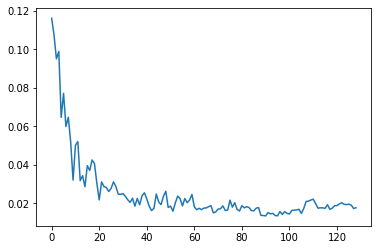

In [490]:
import statistics
plt.plot(x)
statistics.mean(x)

0.6504728244683314

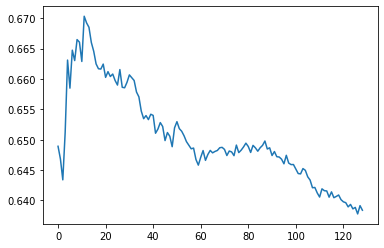

In [491]:
plt.plot(y)
statistics.mean(y)

In [202]:
Linear- 0.024436453266124494 0.6485960246825976
Ridge - 0.024438552433562816 0.6486116994801373
Lasso - 0.022625249113886588 0.6577326342467524
Elastic Net cv - 0.02440347945565136 0.648566790576793
SGD cv - 

SyntaxError: invalid syntax (<ipython-input-202-b874ea4e624b>, line 1)